In [2]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('./AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.dropna()
df = df.drop(df[df['price'] == 0].index)


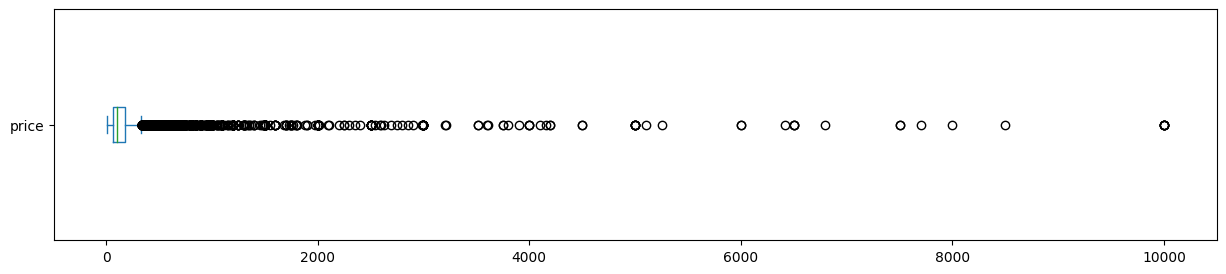

Values over $1000.00: 
239
0.4889%


Values equal to $0: 
0
0.0000%


In [5]:

# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to  500.00
print('Values over $1000.00: ')
print(len(df[df['price'] > 1000]))
print('{:.4f}%'.format((len(df[df['price'] > 1000]) / df.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(df[df['price'] == 0]))
print('{:.4f}%'.format((len(df[df['price'] == 0]) / df.shape[0]) * 100))

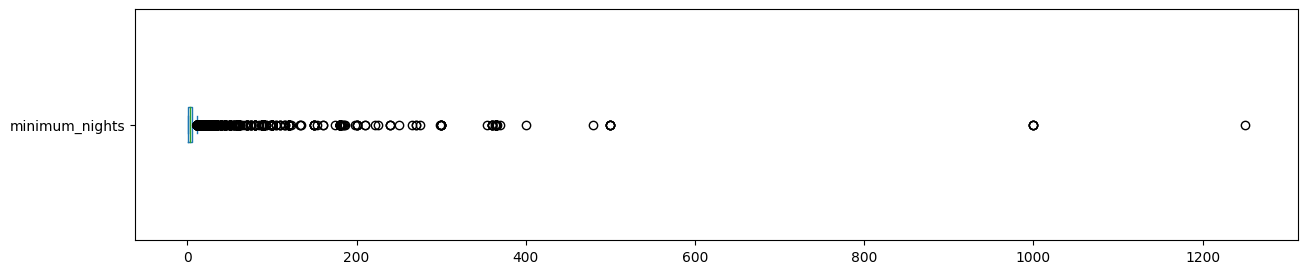

Values over 30 nights: 
747
1.5281%


In [6]:
# Displaying the box plot
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(df[df['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0]) * 100))

In [7]:

# Selecting the rows that fulfil the established requirements
df = df[(df['price'] <= 1000) & (df['price'] > 0) & (df['minimum_nights'] <= 30)].copy()
df.reset_index()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47919,48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
47920,48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
47921,48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
47922,48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [8]:
dataset = df[['price', 'room_type', 'neighbourhood_group', 'neighbourhood']]


# display the modified dataframe
print(dataset)

       price        room_type neighbourhood_group       neighbourhood
0        149     Private room            Brooklyn          Kensington
1        225  Entire home/apt           Manhattan             Midtown
2        150     Private room           Manhattan              Harlem
3         89  Entire home/apt            Brooklyn        Clinton Hill
4         80  Entire home/apt           Manhattan         East Harlem
...      ...              ...                 ...                 ...
48890     70     Private room            Brooklyn  Bedford-Stuyvesant
48891     40     Private room            Brooklyn            Bushwick
48892    115  Entire home/apt           Manhattan              Harlem
48893     55      Shared room           Manhattan      Hell's Kitchen
48894     90     Private room           Manhattan      Hell's Kitchen

[47924 rows x 4 columns]


In [9]:
# Define categorical feature columns
cat_cols = ["room_type", "neighbourhood_group"]

# Create one-hot encoder for categorical features
encoder = OneHotEncoder()
transformer = ColumnTransformer(
    transformers=[("cat", encoder, cat_cols)],
    remainder="passthrough"
)

# Transform data using one-hot encoder
encoded_cols = transformer.fit_transform(dataset)
feature_names = transformer.get_feature_names_out()  

dataset = pd.DataFrame(encoded_cols, columns=feature_names)


dataset


,cat__room_type_Entire home/apt,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,remainder__price,remainder__neighbourhood
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,149,Kensington
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225,Midtown
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,150,Harlem
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89,Clinton Hill
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80,East Harlem
...,...,...,...,...,...,...,...,...,...,...
47919,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,70,Bedford-Stuyvesant
47920,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,40,Bushwick
47921,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,115,Harlem
47922,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55,Hell's Kitchen


In [10]:
neighbourhood_means = dataset.groupby('remainder__neighbourhood')['remainder__price'].mean()
dataset['neighbourhood_Encoded'] = dataset['remainder__neighbourhood'].map(neighbourhood_means)
dataset

,cat__room_type_Entire home/apt,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,remainder__price,remainder__neighbourhood,neighbourhood_Encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,149,Kensington,93.063584
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225,Midtown,266.583001
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,150,Harlem,113.805598
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89,Clinton Hill,149.953901
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80,East Harlem,120.762035
...,...,...,...,...,...,...,...,...,...,...,...
47919,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,70,Bedford-Stuyvesant,101.457844
47920,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,40,Bushwick,84.093852
47921,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,115,Harlem,113.805598
47922,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55,Hell's Kitchen,196.579386


In [11]:
print(len(dataset.neighbourhood_Encoded.unique()))
print(len(dataset.remainder__neighbourhood.unique()))

221
221


In [12]:
# Select rows with NaN values
df_with_nan = dataset[dataset.isna().any(axis=1)]
# Print the resulting DataFrame
df_with_nan

,cat__room_type_Entire home/apt,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,remainder__price,remainder__neighbourhood,neighbourhood_Encoded


In [13]:
y = dataset['remainder__price'].astype(int)
X = dataset.drop('remainder__neighbourhood', axis=1)
X = X.drop('remainder__price', axis=1)
features = [col for col in X]
X

,cat__room_type_Entire home/apt,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,neighbourhood_Encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,93.063584
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,266.583001
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,113.805598
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,149.953901
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,120.762035
...,...,...,...,...,...,...,...,...,...
47919,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,101.457844
47920,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,84.093852
47921,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,113.805598
47922,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,196.579386


In [14]:
scaled_data = preprocessing.scale(X)  
scaled_data

array([[-1.03240871,  1.08283761, -0.15603016, ..., -0.36389512,
        -0.08784677, -0.92393513],
       [ 0.96860864, -0.92349951, -0.15603016, ..., -0.36389512,
        -0.08784677,  2.39868743],
       [-1.03240871,  1.08283761, -0.15603016, ..., -0.36389512,
        -0.08784677, -0.52675834],
       ...,
       [ 0.96860864, -0.92349951, -0.15603016, ..., -0.36389512,
        -0.08784677, -0.52675834],
       [-1.03240871, -0.92349951,  6.40901746, ..., -0.36389512,
        -0.08784677,  1.05822885],
       [-1.03240871,  1.08283761, -0.15603016, ..., -0.36389512,
        -0.08784677,  1.05822885]])

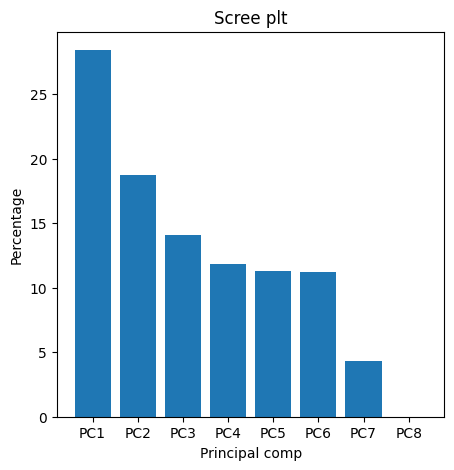

In [15]:
pca = PCA(n_components=8)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(5, 5))
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

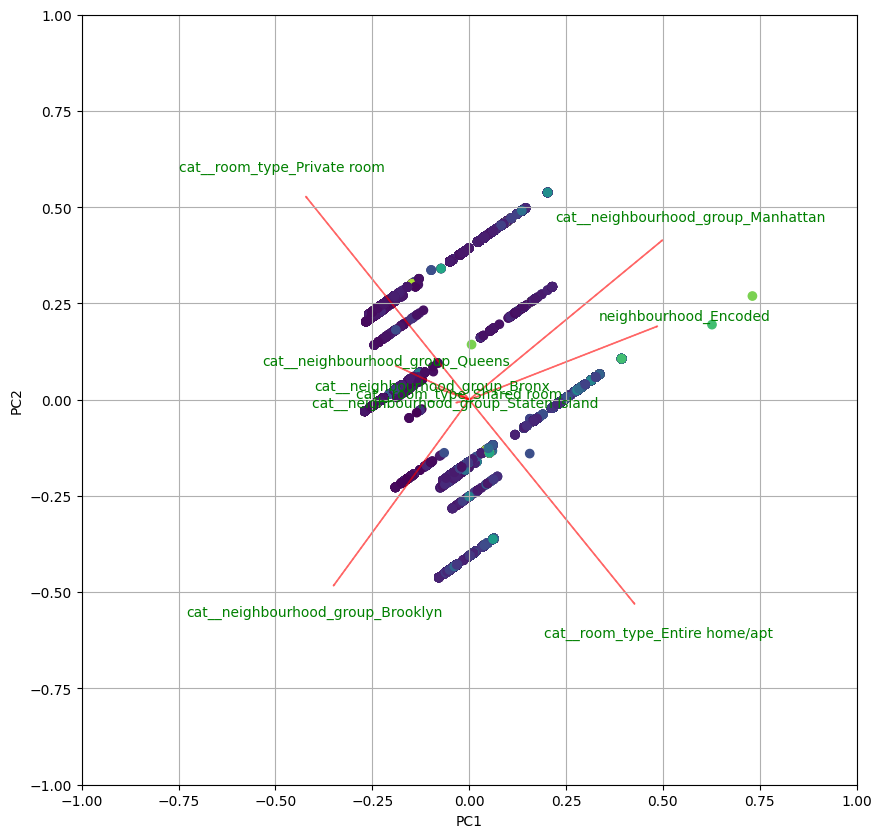

In [16]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(10, 10))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.

myplot(pca_data,np.transpose(pca.components_),features)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_pca_components = [1, 2, 3, 4, 5, 6,7]

scores = []

y_train

1892     125
20608     75
19668     34
31662    339
12369     84
        ... 
40059     85
28017    200
29199    140
40061     45
17673    119
Name: remainder__price, Length: 33546, dtype: int32

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7


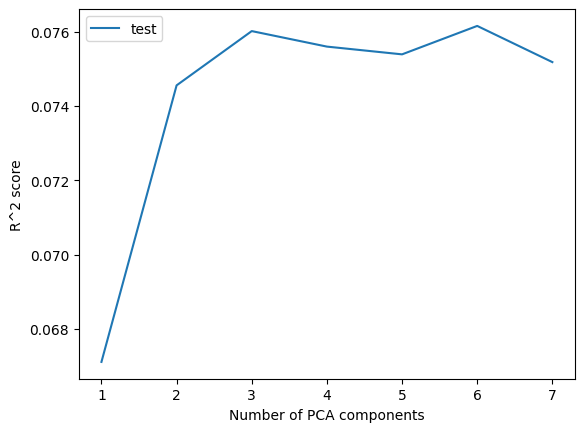

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_pca_components = [1, 2, 3, 4, 5, 6,7]

scores = []

for n_comp in n_pca_components:

    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model=SVC(C=100,gamma='auto',kernel='rbf')
    model.fit(X_train_pca,y_train)
    y_pred=model.predict(X_test_pca)
    scores.append(accuracy_score(y_test,y_pred))
    print('Step', n_comp)

plt.plot(n_pca_components, scores, label='test')
plt.xlabel('Number of PCA components')
plt.ylabel('R^2 score')
plt.legend()
plt.show()